# predict cases of breast cancer 
## 1. Importing Libraries 
pandas to manipulate data and matplotlib and seaborn for the data visualization

In [1]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt
import seaborn as sns

## 2. import the dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv("/content/drive/MyDrive/Breast_cancer_data.csv")
data

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0
565,20.13,28.25,131.20,1261.0,0.09780,0
566,16.60,28.08,108.30,858.1,0.08455,0
567,20.60,29.33,140.10,1265.0,0.11780,0


Check if there is any missing Values and the datatype of each feature 

In [3]:
data.dtypes

mean_radius        float64
mean_texture       float64
mean_perimeter     float64
mean_area          float64
mean_smoothness    float64
diagnosis            int64
dtype: object

In [4]:
total_null = data.isnull().sum()
total_null

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

## 3. Splitting Data

In [5]:
from sklearn.model_selection import train_test_split
x = data.drop('diagnosis', axis = 1)
y = data['diagnosis']
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.33 , random_state =0)

## 4.building the model

In [6]:
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.svm import SVC


svm = SVC(C=100, kernel='linear')
svm.fit(x_train, y_train)

pred = svm.predict(x_test)
accuracy = round(accuracy_score(y_test,pred),6)

print("Accuracy for SVM : ", accuracy)


Accuracy for SVM :  0.920213


## 5.confusion matrix

In [7]:
tn,fp,fn,tp=confusion_matrix(y_test,pred).ravel()
print("Confusion Matrix")
print("tn =",tn,"fp =",fp)
print("fn =",fn,"tp =",tp)

Confusion Matrix
tn = 63 fp = 4
fn = 11 tp = 110


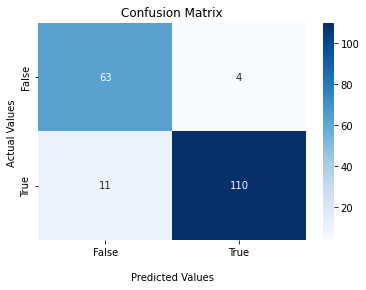

In [8]:
conf_matrix = confusion_matrix(y_test, pred)
ax = sns.heatmap(conf_matrix, annot=True, cmap = "Blues",fmt="d")
ax.set_title("Confusion Matrix")
ax.set_xlabel("\nPredicted Values")
ax.set_ylabel('Actual Values ')
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()